 Please run the JSON creators found in PreProcessing folder or download an example by runnnig the commeted code below

In [3]:
# from google_drive_downloader import GoogleDriveDownloader as gdd
# gdd.download_file_from_google_drive(file_id='1lDGIkS7QDy7mUDStDtb_fhMR5euF2R6v',dest_path='../resources/icepoints2019-02-08.json')
# gdd.download_file_from_google_drive(file_id='1qgePy_WsVN924fdJhnvcMpqCCRfvUC9i',dest_path='../resources/currentPoints.json')

In [4]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid

#read in Ice  & Currents Points
icePoints     = pd.read_json('../resources/icepoints2019-02-08.json')
icePoints     = pd.DataFrame.from_records(icePoints.icepoints)
currentPoints = pd.read_json('../resources/currentPoints.json')
currentPoints = pd.DataFrame.from_records(currentPoints.currentPoints)

In [5]:
longMin    = 260
longMax    = 360
latMin     = -75
latMax     = -40
cellWidth  = 5
cellHeight = 2.5

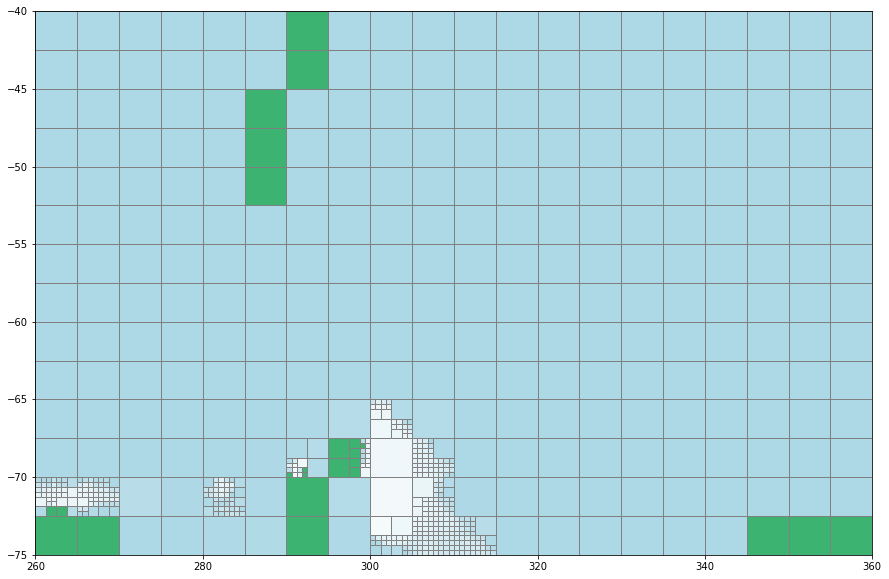

In [6]:
cellGrid = CellGrid(longMin, longMax, latMin, latMax, cellWidth, cellHeight)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(3)
cellGrid.plot()

In [7]:
from RoutePlanner.Optimisation import TravelTime
OptInfo = {}
OptInfo['WayPoints']            = pd.read_csv('../resources/WayPoints_TestExample2.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3 #Units km/hr

In [8]:
TT = TravelTime(cellGrid,OptInfo)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = Falklands ===
=== Processing Waypoint = SouthGeorgia ===


(-60.0, -50.0)

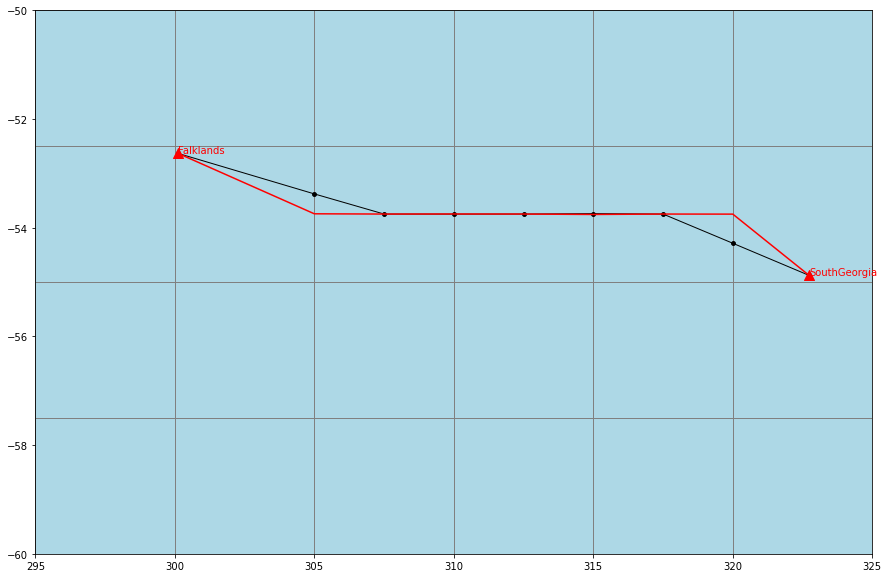

In [12]:
# Loading Ground Truth & Comparing
GT = pd.read_csv('../resources/TestExample_GroundTruth2.csv')
GT['Long'] = GT['Long']+360
ax = TT.PlotPaths(waypoints=['Falklands'],routepoints=True)
ax.plot(GT['Long'],GT['Lat'],'r')
ax.set_xlim([295,325])
ax.set_ylim([-60,-50])

(-60.0, -50.0)

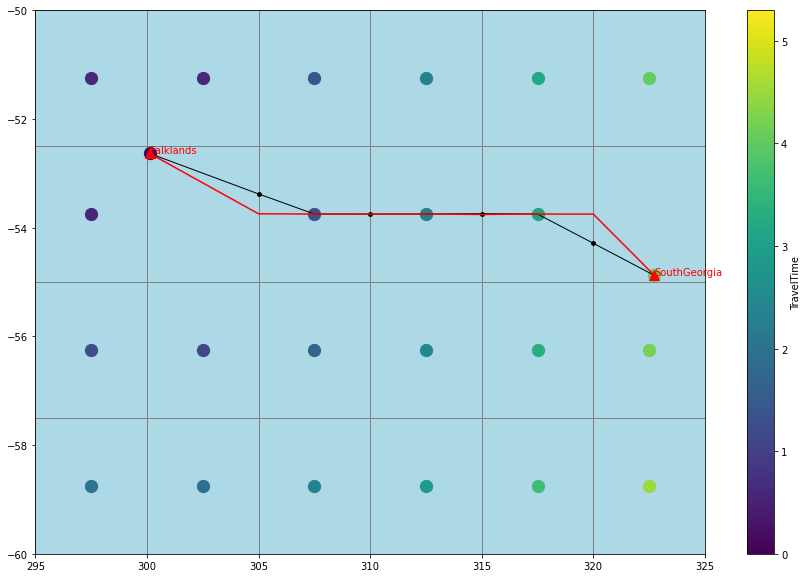

In [15]:
import numpy as np
import matplotlib.pylab as plt
Waypoint = 'Falklands'

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }

ax = TT.PlotPaths(waypoints=[Waypoint],routepoints=True)
for idx,cellInfo in TT.DijkstraInfo[Waypoint]['Info'].iterrows():
    if cellInfo['TotalCost'] == np.inf:
        continue
    cell = cellGrid.cellBoxes[cellInfo['CellIndex']]
    quad = ax.scatter(cell.cx,cell.cy,150,cellInfo['TotalCost'],vmin=0,vmax=TT.DijkstraInfo[Waypoint]['Info']['TotalCost'][TT.DijkstraInfo[Waypoint]['Info']['TotalCost'] != np.inf].max())


    #ax.text(cell.cx,cell.cy,'{:.2f}'.format(cellInfo['TotalCost']),color='k',zorder=100,fontdict=font)
plt.colorbar(quad,ax=ax,label='TravelTime')
ax.plot(GT['Long'],GT['Lat'],'r')
ax.set_xlim([295,325])
ax.set_ylim([-60,-50])